In [28]:
import numpy as np
import scipy
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve


# Problem 1

In [372]:
import numpy as np
N  = 100
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = .1

In [511]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [512]:
def circular_u0(N,filled,randomized = True):
    if randomized:
        U_0 = np.random.random((N,N))-.5
    else:
        U_0 = np.zeros((N,N))
    if filled:
        for i in range(N):
            for j in range(N):
                if np.dot([i/N-.5,j/N-.5],[i/N-.5,j/N-.5]) < .1:
                    U_0[i,j] = 1
    else:
        theta = np.linspace(0,2*np.pi,N*2)
        for th in theta:
            x,y = .3*np.sin(th)+.5,.3*np.cos(th)+.5
            x = int(np.round(x*N))
            y = int(np.round(y*N))
            U_0[x,y] = 1
    return(U_0)

def tictactoe_u0(N,randomized=True):
    if randomized:
        U_0 = np.random.random((N,N))-.5
    else:
        U_0 = np.zeros((N,N))
    U_0[2*N//3,:] = 1    
    U_0[N//3,:] = 1    
    U_0[:,2*N//3] = 1
    U_0[:,N//3] = 1
    return U_0

In [513]:
np.random.seed(26)
# U0 = np.random.random((N,N))
U0 = circular_u0(N,False,True)
# U0 = tictactoe_u0(N)
U0 = U0 - np.mean(U0)
lap = create_2d_laplacian(N,dx)
# f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [514]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [515]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [516]:
f = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))

In [517]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0

    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    elap = epsilon**2*lap
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u = f(u_star,step)
        assert(np.mean(np.sign(u)==np.sign(u_star))==1)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u = f(u_star,step)
    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [518]:
uu,tt = run_forward_method(u0_flat,f,lap,0,50,dt)

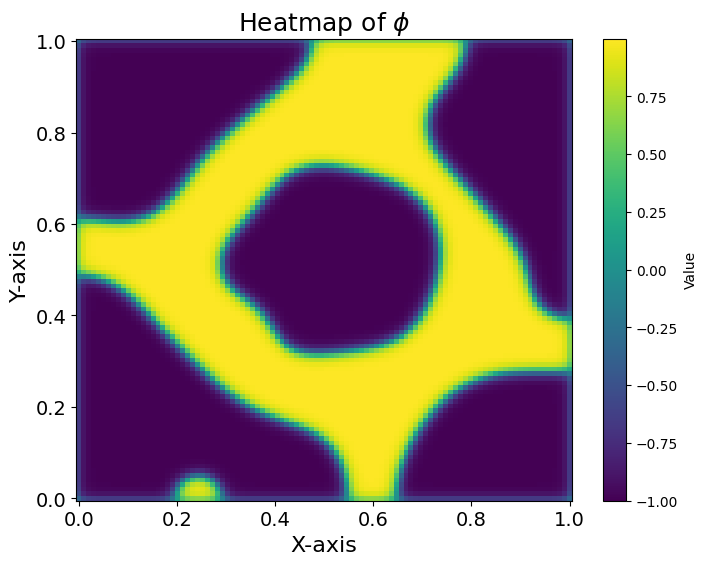

In [519]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values
U = uu[-1].reshape(N,N)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, U, shading='auto', cmap='viridis')  # Shading 'auto' prevents visual artifacts
plt.colorbar(label='Value')  # Add a color bar to show value scale
plt.xlabel('X-axis',fontsize = 16)
plt.ylabel('Y-axis',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(r'Heatmap of $\phi$',fontsize = 18)
plt.show()


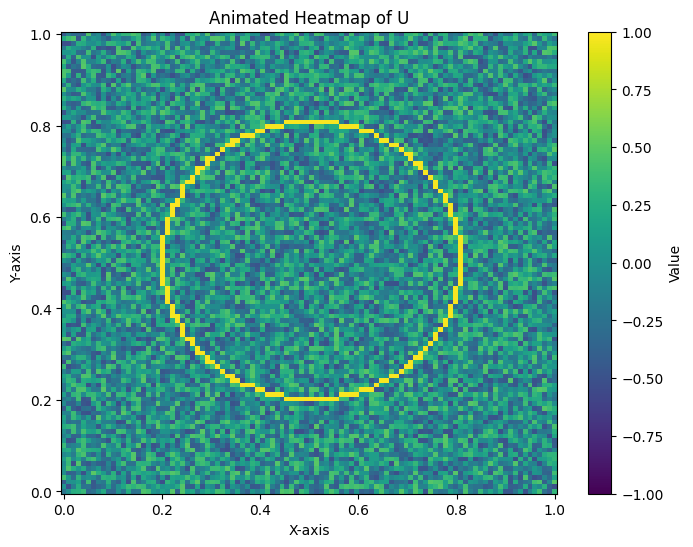

In [520]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
astep = len(uu)//30
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu[0].reshape(N,N), shading='auto', cmap='viridis', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=30, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


[1.812424078563668e-18, -0.0007960067917664508, -0.0014112872617340706, -0.0019586790203667305, -0.002493814586019386, -0.003049311593193535, -0.0036475515412899727, -0.004306244450953524, -0.005041136051699239, -0.005867436036220207, -0.006800611464505668, -0.007856830796146843, -0.009053191502497537, -0.010407794145093126, -0.01193969217003223, -0.013668730728066382, -0.015615281322127385, -0.01779987799352419, -0.020242762834879663, -0.02296335234281215, -0.025979640311880173, -0.02930755669099151, -0.03296030446448794, -0.03694769800169737, -0.04127552672331197, -0.04594496798152001, -0.05095207340127125, -0.05628735389241091, -0.061935489808958424, -0.06787519341982758, -0.07407924989382464, -0.0805147596282719, -0.08714359873089823, -0.09392310581923916, -0.10080699178515355, -0.10774645414386488, -0.11469145876721609, -0.1215921306205864, -0.1284001755468981, -0.13507024284107055, -0.14156113825272953, -0.14783681066485976, -0.1538670601421982, -0.15962794437011407, -0.165101888

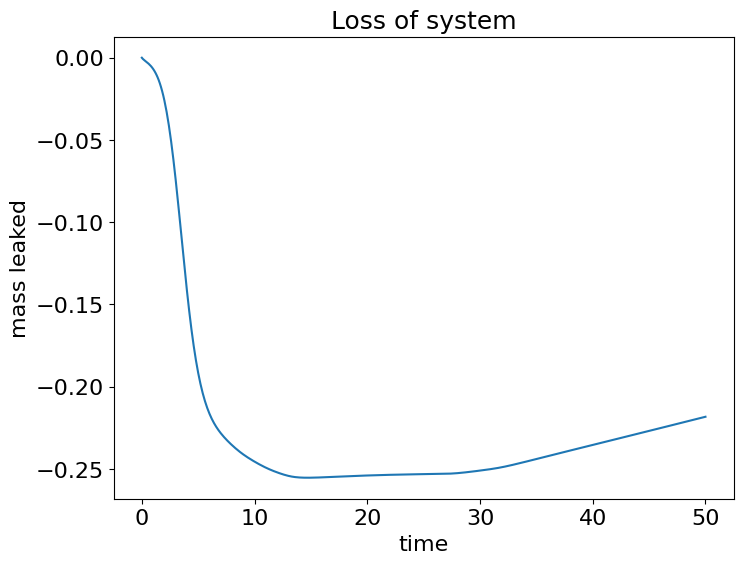

In [521]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
print(mass)
print(len(uu))
fig,ax = plt.subplots(figsize=(8, 6))
plt.plot(tt,mass)
ax.set_title('Loss of system',fontsize=18)
ax.set_xlabel('time',fontsize=16)
ax.set_ylabel('mass leaked',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

# Problem 2

In [522]:
import numpy as np
N  = 100
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = 1

In [523]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [524]:
np.random.seed(69420)
U0 = np.random.random((N,N))
U0 = np.full((N,N),.0 )
U0[:N//4,:N//4]  = -.5
U0[N//4:,N//4:]  = .5
U0 = U0 - np.mean(U0)

# U0 = np.random.random((N,N))
U0 = circular_u0(N,False,True)
# U0 = tictactoe_u0(N)
lap = create_2d_laplacian(N,dx)
f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [525]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [526]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [527]:
phi_star = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))
F = lambda phi : (phi**2-1)**2/4
F_prime = lambda phi: phi**3 - phi
beta = lambda phi_ss, phi_0 : sum(phi_0 - phi_ss)/sum(np.sqrt(F(phi_ss))) * 1/dt
phi_ss = lambda phi_ss, phi_0 : phi_ss + dt*beta(phi_ss,phi_0)*np.sqrt(F(phi_ss))

In [528]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0
    u0 = u
    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u_ss = f(u_star,step)
        u = phi_ss(u_ss,u0)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u_ss = f(u_star,step)
    u = phi_ss(u_ss,u0)

    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [529]:
uu,tt = run_forward_method(u0_flat,f,lap,0,100,dt)

C:\Users\andyh\AppData\Local\Temp\ipykernel_9140\3993574408.py:10: UserWarning: shading value 'bilinear' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(xx, yy, U, shading='bilinear', cmap='viridis')  # Shading 'auto' prevents visual artifacts


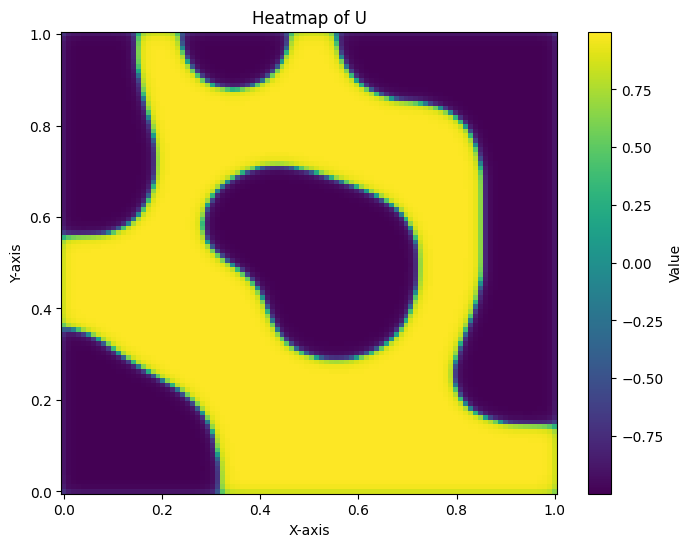

In [530]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values
U = uu[-1].reshape(N,N)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, U, shading='bilinear', cmap='viridis')  # Shading 'auto' prevents visual artifacts
plt.colorbar(label='Value')  # Add a color bar to show value scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of U')
plt.show()


In [531]:
# Interpolate data to add more frames
num_original_frames = len(uu)
interpolation_factor = 1  # Number of extra frames between each original frame
num_frames = num_original_frames * interpolation_factor

uu_interp = []
for i in range(num_original_frames - 1):
    for t in np.linspace(0, 1, interpolation_factor, endpoint=False):
        U_interp = (1 - t) * uu[i] + t * uu[i + 1]
        uu_interp.append(U_interp)
uu_interp.append(uu[-1])  # Add the last frame

C:\Users\andyh\AppData\Local\Temp\ipykernel_9140\3674681304.py:11: UserWarning: shading value 'cubic' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)


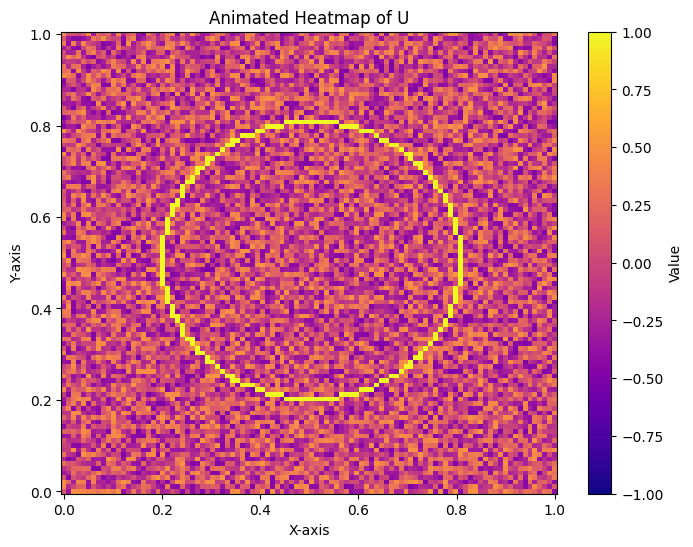

In [532]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
frames = 60
astep = len(uu_interp)//frames
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu_interp[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


In [533]:
import pandas as pd

In [534]:
print(pd.DataFrame(uu[-1]).describe())
print((uu[-1]).flatten())
x = uu[-1].flatten()
print(len(x[x > .99])/len(x))
print(len(x[x < -.99])/len(x))

                  0
count  10000.000000
mean       0.018554
std        0.964465
min       -1.000000
25%       -0.996247
50%        0.486693
75%        0.998444
max        1.000000
[-0.71606815 -0.84274085 -0.87596495 ... -0.87596495 -0.84274085
 -0.71606815]
0.3511
0.3205


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 50]
[-2.110145259497171e-17, -1.3113897092920272e-17, -3.7672649830570964e-17, 6.994078449557478e-18, -1.6213545496701429e-16, -2.161806066226857e-17, -7.057660980917092e-17, -1.0681865268415058e-16, 6.358253135961344e-18, 3.814951881576807e-17, 3.4080236808752803e-16, 6.688882299031334e-16, 5.474455950062718e-16, 3.458889705962971e-16, 7.439156169074773e-17, 8.456476670828588e-17, -1.2843671334641915e-16, -2.842139151774721e-16, -5.72242782236521e-17, -1.882042928244558e-16, 1.7421613592534082e-16, -4.717823826883318e-16, -3.179126567980672e-17, 3.814951881576807e-17, -2.1872390787707023e-16, 5.0866025087690756e-18, 9.32119909731933e-16, 1.3225166522799596e-16, -4.9594374460498486e-17, -5.518963722014447e-16, -9.016002946793186e-16, 1.0681865268415058e-16, 1.424248702455341e-16, -6.968645437013633e-16, -1.6277128028061042e-16, -4.5

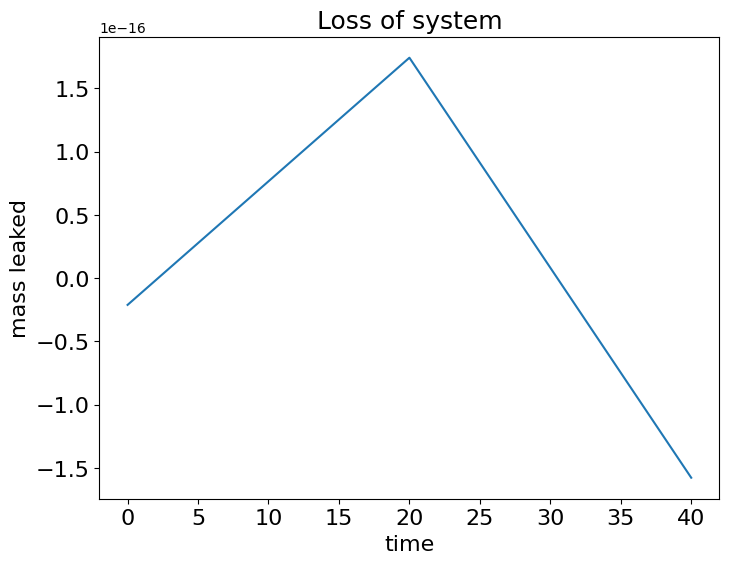

In [123]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
pltmass = [mass[i] for i in range(len(mass) ) if i % 20 == 0]
pltt = [tt[i] for i in range(len(tt) )if i % 20 == 0]
tt = np.round(tt,4)
print(tt)
print(mass)
print(len(uu))
fig,ax = plt.subplots(figsize=(8, 6))
ax.plot(pltt,pltmass)
ax.set_title('Loss of system',fontsize=18)
ax.set_xlabel('time',fontsize=16)
ax.set_ylabel('mass leaked',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)